### Objectifs de cette page: ###
- analyser les données obtenues (voir s'il y a des valeurs manquantes et si cohérence)
- retirer les données inutiles
- créer des 2 sets de données 1min et 5min avec la colonne "high_before_low"
- regarder si la colonne crée semble cohérente 
- générer un backtest pour chaque set de données (peut etre sur une autre page)

In [1]:
import pandas as pd

def create_df_from_csv(timeFramesUsed=["1m"], instrument="ES",
    start_date="2020-03-20 00:00:00", end_date="2025-02-26 12:00:00", let_original_rangeTime=False):
    
    main_df = pd.DataFrame()
    root_path = "C:/Users/tessa/Codes/Backtest_Trading/market_data/"
    for timeFrame in timeFramesUsed:
        if instrument == "ES":
            path = root_path+f"ES_{timeFrame}_2-10-2020-12-00PM_3-10-2025-12-00PM.csv"
        else:
            print("No data found for this instrument to generate dataframe")
            return None
        
        main_df = pd.read_csv(
            filepath_or_buffer=path,
            usecols=["Time left", "Open", "High", "Low","Close", "Volume"],
            # names=["datetime", "open", "high", "low","close", "volume","high_before_low"],
            #header=None,
            delimiter=";",
            # dtype={'high_before_low': 'boolean'}
        ).rename(columns={
            'Time left': 'datetime', 
            'Open': 'open',
            "High":'high', 
            "Low":'low',
            "Close":'close', 
            "Volume":'volume'
        }, inplace=False)

        main_df['datetime'] = pd.to_datetime(main_df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

        if not let_original_rangeTime:
            start_date = pd.to_datetime(start_date) 
            end_date = pd.to_datetime(end_date)
            main_df = main_df[(start_date <= main_df['datetime']) & (main_df['datetime'] <= end_date)]
            main_df.reset_index(inplace=True)

    return main_df

In [2]:
df_15m = create_df_from_csv(timeFramesUsed=["15m"], let_original_rangeTime=True)
df_15m

,close,high,low,open,datetime,volume
0,3327.00,3327.75,3325.75,3326.75,2020-02-10 11:00:00,4593
1,3328.00,3328.25,3326.00,3327.25,2020-02-10 11:15:00,3200
2,3328.25,3328.50,3326.00,3328.00,2020-02-10 11:30:00,2968
3,3327.00,3328.25,3326.25,3328.25,2020-02-10 11:45:00,2182
4,3325.00,3328.75,3323.00,3327.00,2020-02-10 12:00:00,7900
...,...,...,...,...,...,...
117851,6071.00,6071.25,6067.50,6070.50,2025-02-10 09:45:00,1735
117852,6071.50,6073.50,6071.00,6071.25,2025-02-10 10:00:00,1732
117853,6073.00,6074.50,6071.00,6071.50,2025-02-10 10:15:00,2330
117854,6075.25,6077.00,6072.50,6073.25,2025-02-10 10:30:00,3078


In [3]:
df_15m.isnull().sum()

close       0
high        0
low         0
open        0
datetime    0
volume      0
dtype: int64

In [4]:
df_1h = create_df_from_csv(timeFramesUsed=["1h"], let_original_rangeTime=True)
df_1h

,close,high,low,open,datetime,volume
0,3327.00,3328.50,3325.75,3326.75,2020-02-10 11:00:00,12943
1,3324.50,3328.75,3323.00,3327.00,2020-02-10 12:00:00,19010
2,3321.00,3326.50,3319.25,3324.50,2020-02-10 13:00:00,34522
3,3332.00,3332.25,3314.75,3321.25,2020-02-10 14:00:00,196006
4,3337.75,3341.50,3331.75,3332.00,2020-02-10 15:00:00,199309
...,...,...,...,...,...,...
29554,6065.50,6067.75,6063.50,6067.50,2025-02-10 06:00:00,4025
29555,6064.00,6066.50,6062.50,6065.75,2025-02-10 07:00:00,5884
29556,6067.75,6069.00,6062.50,6064.00,2025-02-10 08:00:00,9131
29557,6071.00,6072.50,6065.50,6068.00,2025-02-10 09:00:00,7870


In [5]:
df_1h.isnull().sum()

close       0
high        0
low         0
open        0
datetime    0
volume      0
dtype: int64

In [6]:
root_path = "C:/Users/tessa/Codes/Backtest_Trading/market_data/"
df_1h.to_csv(root_path+"ES_1h_2-10-2020-12-00PM_3-10-2025-12-00PM_preprocessed.csv", sep=';', index=False)

In [7]:
root_path = "C:/Users/tessa/Codes/Backtest_Trading/market_data/"
df_15m.to_csv(root_path+"ES_15m_2-10-2020-12-00PM_3-10-2025-12-00PM_preprocessed.csv", sep=';', index=False)

In [50]:
df_1m = create_df_from_csv(let_original_rangeTime=True)
df_1m

,close,high,low,open,datetime,volume
0,3327.25,3327.75,3326.75,3326.75,2020-02-10 11:00:00,407
1,3327.25,3327.25,3326.50,3327.25,2020-02-10 11:01:00,126
2,3327.00,3327.25,3326.50,3327.00,2020-02-10 11:02:00,204
3,3326.50,3327.25,3326.50,3327.00,2020-02-10 11:03:00,233
4,3326.75,3326.75,3326.00,3326.50,2020-02-10 11:04:00,521
...,...,...,...,...,...,...
8062697,5708.50,5709.00,5708.25,5709.00,2025-03-10 10:59:10,73
8062698,5708.50,5708.75,5708.25,5708.50,2025-03-10 10:59:20,22
8062699,5708.25,5708.75,5708.25,5708.50,2025-03-10 10:59:30,9
8062700,5708.25,5708.50,5707.75,5708.50,2025-03-10 10:59:40,106


In [51]:
df_1m.isnull().sum()

close       0
high        0
low         0
open        0
datetime    0
volume      0
dtype: int64

In [37]:
import matplotlib.pyplot as plt 

def plot_graph_of_df(df):
    plt.figure(figsize=(16,12))
    plt.plot(df['datetime'], df['close'], label='Prix de clôture', color='b')
    plt.title('Courbe de Clôture du S&P 500', fontsize=14)
    plt.xlabel('Date/Heure', fontsize=12)
    plt.ylabel('Prix de Clôture', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

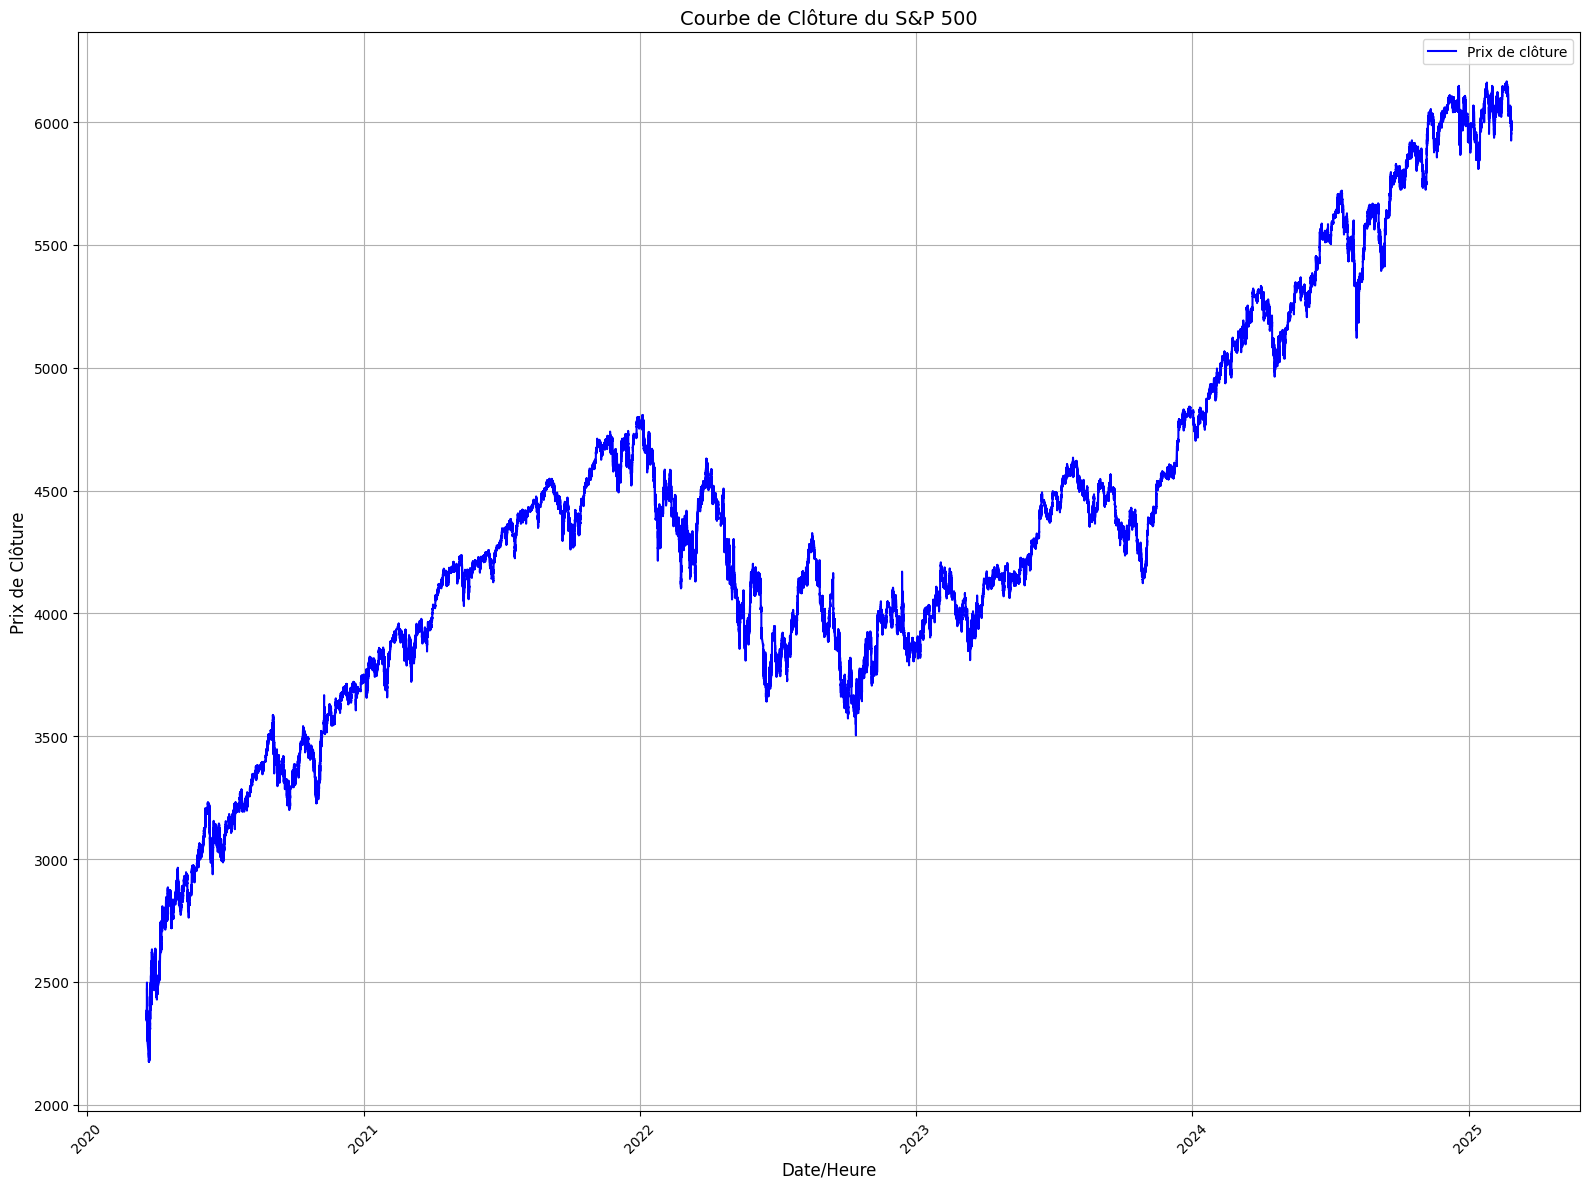

In [ ]:
plot_graph_of_df(df_1m)

In [52]:
df_10s = create_df_from_csv(["10s"], let_original_rangeTime=True)
df_10s

,close,high,low,open,datetime,volume
0,3327.25,3327.25,3326.75,3326.75,2020-02-10 11:00:00,126
1,3327.50,3327.75,3327.50,3327.50,2020-02-10 11:00:10,101
2,3327.25,3327.50,3327.25,3327.50,2020-02-10 11:00:20,7
3,3327.00,3327.25,3327.00,3327.25,2020-02-10 11:00:30,60
4,3327.00,3327.00,3327.00,3327.00,2020-02-10 11:00:40,77
...,...,...,...,...,...,...
10173645,5708.50,5709.00,5708.25,5709.00,2025-03-10 10:59:10,73
10173646,5708.50,5708.75,5708.25,5708.50,2025-03-10 10:59:20,22
10173647,5708.25,5708.75,5708.25,5708.50,2025-03-10 10:59:30,9
10173648,5708.25,5708.50,5707.75,5708.50,2025-03-10 10:59:40,106


In [53]:
df_10s.isnull().sum()

close       0
high        0
low         0
open        0
datetime    0
volume      0
dtype: int64

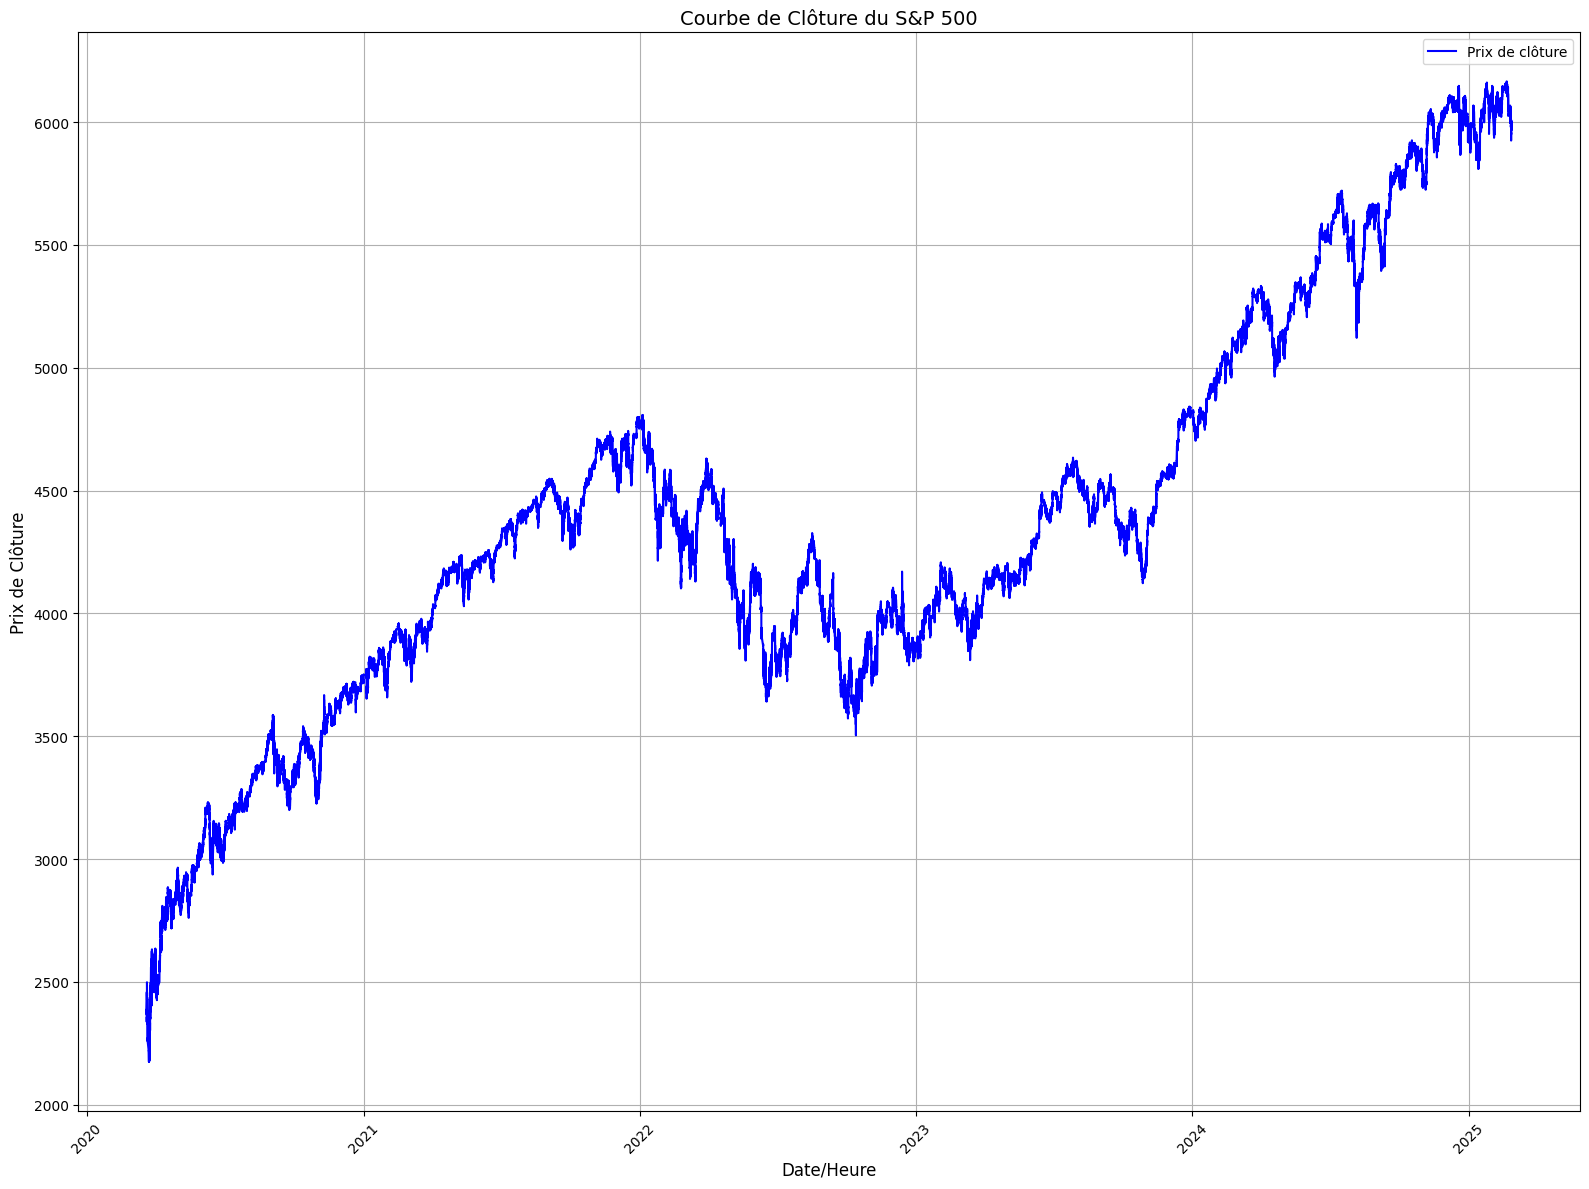

In [ ]:
plot_graph_of_df(df_10s)

In [6]:
from tqdm import tqdm
import numpy as np
import pandas as pd

df_5m = create_df_from_csv(timeFramesUsed=["5m"], instrument="ES", start_date="2023-03-24 12:00", end_date="2025-02-14 12:00", let_original_rangeTime=True)
df_10s = create_df_from_csv(timeFramesUsed=["10s"], instrument="ES", start_date="2023-03-24 12:00", end_date="2025-02-14 12:00", let_original_rangeTime=True)

# Définir la colonne 'datetime' comme index
df_10s.set_index('datetime', inplace=True)

In [7]:
print(df_5m.shape)
print(df_10s.shape)

high_before_low_results = []

def high_before_low(df_10s_segment):
    high_index = df_10s_segment['high'].idxmax()
    low_index = df_10s_segment['low'].idxmin()
    bool1 = high_index < low_index
    # print(f"high index = {high_index}, low index = {low_index}")
    # print(bool1)
    return bool1

 
for timestamp in tqdm(df_5m["datetime"], unit="iteration"):
    # Définir la fenêtre de 5 minutes
    start_time = str(timestamp)
    end_time = str(timestamp + pd.Timedelta(minutes=5))
    df_segment = df_10s.loc[start_time:end_time]
    # df_segment = df_10s[(df_10s['datetime'] >= start_time) & (df_10s['datetime'] < end_time)]
    # print(df_segment)
    if df_segment.empty: 
        high_before_low_results.append(np.nan)
    else:
        high_before_low_results.append(high_before_low(df_segment))

df_5m['high_before_low'] = high_before_low_results
print(df_5m[['datetime', 'high_before_low']])

(358972, 6)
(10173650, 5)


100%|██████████| 358972/358972 [04:52<00:00, 1225.28iteration/s]


                  datetime high_before_low
0      2020-02-09 23:00:00             NaN
1      2020-02-09 23:05:00             NaN
2      2020-02-09 23:10:00             NaN
3      2020-02-09 23:15:00             NaN
4      2020-02-09 23:20:00             NaN
...                    ...             ...
358967 2025-03-09 22:35:00           False
358968 2025-03-09 22:40:00            True
358969 2025-03-09 22:45:00            True
358970 2025-03-09 22:50:00           False
358971 2025-03-09 22:55:00            True

[358972 rows x 2 columns]


In [ ]:
root_path = "C:/Users/tessa/Codes/Backtest_Trading/market_data/"
df_5m_filtered.to_csv(root_path+"ES_5m_2-10-2020-12-00PM_3-10-2025-12-00PM_preprocessed.csv", sep=';', index=False)

In [ ]:
df_1m_old = pd.read_csv(root_path+"ES_1m_2-10-2020-12-00PM_3-10-2025-12-00PM_preprocessed_old.csv", sep=';')

C:\Users\tessa\AppData\Local\Temp\ipykernel_10148\2827038846.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1m_old = pd.read_csv(root_path+"ES_1m_2-10-2020-12-00PM_3-10-2025-12-00PM_prepocessed_old.csv", sep=';')


In [9]:
df_5m_filtered = df_5m[("2020-02-10 12:00" <= df_5m['datetime'])]

In [11]:
df_5m_filtered

,close,high,low,open,datetime,volume,high_before_low
156,3324.75,3328.75,3324.75,3327.00,2020-02-10 12:00:00,4192,True
157,3325.75,3325.75,3323.00,3324.75,2020-02-10 12:05:00,2924,False
158,3325.00,3326.00,3324.75,3325.50,2020-02-10 12:10:00,784,True
159,3324.00,3325.50,3323.75,3325.00,2020-02-10 12:15:00,793,True
160,3324.75,3325.50,3323.75,3324.00,2020-02-10 12:20:00,751,False
...,...,...,...,...,...,...,...
358967,5740.00,5740.50,5735.75,5735.75,2025-03-09 22:35:00,1164,False
358968,5738.00,5741.25,5737.00,5740.00,2025-03-09 22:40:00,884,True
358969,5736.75,5741.50,5736.00,5738.25,2025-03-09 22:45:00,1039,True
358970,5737.25,5739.00,5735.50,5737.00,2025-03-09 22:50:00,926,False


In [10]:
df_5m_filtered.isnull().sum()

close              0
high               0
low                0
open               0
datetime           0
volume             0
high_before_low    0
dtype: int64

In [7]:
import numpy as np
root_path = "C:/Users/tessa/Codes/Backtest_Trading/market_data/"
df_1m = pd.read_csv(root_path+"ES_1m_2-10-2020-12-00PM_3-10-2025-12-00PM_prepocessed.csv", sep=';')
#df_1m['high_before_low'] = df_1m['high_before_low'].apply(lambda x: np.random.choice([True, False]) if pd.isna(x) else x)


In [9]:
df_1m

,close,high,low,open,datetime,volume,high_before_low
0,3327.25,3327.75,3326.75,3326.75,2020-02-10 11:00:00,407,False
1,3327.25,3327.25,3326.50,3327.25,2020-02-10 11:01:00,126,True
2,3327.00,3327.25,3326.50,3327.00,2020-02-10 11:02:00,204,True
3,3326.50,3327.25,3326.50,3327.00,2020-02-10 11:03:00,233,True
4,3326.75,3326.75,3326.00,3326.50,2020-02-10 11:04:00,521,False
...,...,...,...,...,...,...,...
8062697,5708.50,5709.00,5708.25,5709.00,2025-03-10 10:59:10,73,True
8062698,5708.50,5708.75,5708.25,5708.50,2025-03-10 10:59:20,22,False
8062699,5708.25,5708.75,5708.25,5708.50,2025-03-10 10:59:30,9,False
8062700,5708.25,5708.50,5707.75,5708.50,2025-03-10 10:59:40,106,False


In [8]:
df_1m.isnull().sum()

close              0
high               0
low                0
open               0
datetime           0
volume             0
high_before_low    0
dtype: int64

In [6]:
df_1m.to_csv(root_path+"ES_1m_2-10-2020-12-00PM_3-10-2025-12-00PM_prepocessed.csv", sep=';', index=False)